In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import math

In [49]:
excel_jogos = pd.read_csv("steam-store-games/steam.csv")
excel_requisitos = pd.read_csv("steam-store-games/steam_requirements_data.csv")

In [50]:
excel_jogos

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
5,60,Ricochet,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Valve Anti-Ch...,Action,Action;FPS;Multiplayer,0,2758,684,175,10,5000000-10000000,3.99
6,70,Half-Life,1998-11-08,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Online Multi-Player...,Action,FPS;Classic;Action,0,27755,1100,1300,83,5000000-10000000,7.19
7,80,Counter-Strike: Condition Zero,2004-03-01,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,Action;FPS;Multiplayer,0,12120,1439,427,43,10000000-20000000,7.19
8,130,Half-Life: Blue Shift,2001-06-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player,Action,FPS;Action;Sci-fi,0,3822,420,361,205,5000000-10000000,3.99
9,220,Half-Life 2,2004-11-16,1,Valve,Valve,windows;mac;linux,0,Single-player;Steam Achievements;Steam Trading...,Action,FPS;Action;Sci-fi,33,67902,2419,691,402,10000000-20000000,7.19


In [64]:
generos = excel_jogos.genres.str.cat(sep=";")
generos = generos.split(";")
lista_generos = []
for i in generos:
    if i not in lista_generos:
        lista_generos.append(i)
lista_software = ["Animation & Modeling", "Web Publishing", "Design & Illustration", "Early Access", "Utilities", "Video Production", "Nudity", "Photo Editing", "Accounting", "Game Development", "Free to Play", "Audio Production", "Tutorial", "Sexual Content", "Education", "Software Training", "Documentary"]
for i in lista_software:
    if i in lista_generos:
        lista_generos.remove(i)
lista_generos

['Action',
 'Strategy',
 'Adventure',
 'Indie',
 'RPG',
 'Casual',
 'Simulation',
 'Racing',
 'Violent',
 'Massively Multiplayer',
 'Sports',
 'Gore']

In [57]:
for i in lista_generos:
    contador = 0
    for k in excel_jogos.genres:
        if i in k:
            contador += 1
    print("{0}:".format(i), contador)

Action: 11903
Strategy: 5247
Adventure: 10032
Indie: 19421
RPG: 4311
Casual: 10210
Simulation: 5194
Racing: 1024
Violent: 843
Massively Multiplayer: 723
Sports: 1322
Gore: 537


# DF só com jogos

In [58]:
for i in lista_software:
    excel_only_jogos = excel_jogos[~excel_jogos.genres.str.contains(i)]
excel_only_jogos

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,ratings
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19,127873
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99,3951
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99,3814
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99,1540
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99,5538
5,60,Ricochet,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Valve Anti-Ch...,Action,Action;FPS;Multiplayer,0,2758,684,175,10,5000000-10000000,3.99,3442
6,70,Half-Life,1998-11-08,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Online Multi-Player...,Action,FPS;Classic;Action,0,27755,1100,1300,83,5000000-10000000,7.19,28855
7,80,Counter-Strike: Condition Zero,2004-03-01,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,Action;FPS;Multiplayer,0,12120,1439,427,43,10000000-20000000,7.19,13559
8,130,Half-Life: Blue Shift,2001-06-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player,Action,FPS;Action;Sci-fi,0,3822,420,361,205,5000000-10000000,3.99,4242
9,220,Half-Life 2,2004-11-16,1,Valve,Valve,windows;mac;linux,0,Single-player;Steam Achievements;Steam Trading...,Action,FPS;Action;Sci-fi,33,67902,2419,691,402,10000000-20000000,7.19,70321


In [ ]:
price = steam["price"]
positive = steam["positive_ratings"]
negative = steam["negative_ratings"]
i = 0
total = 27075
percent_positive = []
percent_negative = []
percent_p = 0
percent_n = 0
while i <= 27074:
    percent_p = positive[i]/(positive[i] + negative[i])
    percent_n = negative[i]/(positive[i] + negative[i])
    percent_positive.append(percent_p)
    percent_negative.append(percent_n)
    i += 1
    
line = range(0, 27074)

df_percent_positive = pd.DataFrame(percent_positive)
df_test = df_percent_positive.join(steam, how='inner', lsuffix=' ', rsuffix=' ')
df_test = df_test.rename(columns = {0:'Percent_Positive'})
df_test

# Número de categorias

In [63]:
n_cat = []
for i in excel_jogos.categories:
    n_cat.append(i.count(";")+1)
excel_jogos["n_cat"] = pd.Series(n_cat)

# Porcentagem de ratings

In [ ]:
excel_jogos["ratings"] = excel_jogos["positive_ratings"] + excel_jogos["negative_ratings"]

per_ratings = []
for i excel_jogos.positive_ratings:
    per_ratings.append(i/)

In [65]:
excel_jogos.describe()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,ratings,n_cat
count,2.707500e+04,27075.000000,27075.000000,27075.000000,2.707500e+04,27075.000000,27075.000000,27075.00000,27075.000000,2.707500e+04,27075.000000
mean,5.962035e+05,0.981127,0.354903,45.248864,1.000559e+03,211.027147,149.804949,146.05603,6.078193,1.211586e+03,3.313980
std,2.508942e+05,0.136081,2.406044,352.670281,1.898872e+04,4284.938531,1827.038141,2353.88008,7.874922,2.242909e+04,2.235836
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000,1.000000e+00,1.000000
25%,4.012300e+05,1.000000,0.000000,0.000000,6.000000e+00,2.000000,0.000000,0.00000,1.690000,1.000000e+01,2.000000
50%,5.990700e+05,1.000000,0.000000,7.000000,2.400000e+01,9.000000,0.000000,0.00000,3.990000,3.600000e+01,3.000000
75%,7.987600e+05,1.000000,0.000000,23.000000,1.260000e+02,42.000000,0.000000,0.00000,7.190000,1.760000e+02,4.000000
max,1.069460e+06,1.000000,18.000000,9821.000000,2.644404e+06,487076.000000,190625.000000,190625.00000,421.990000,3.046717e+06,18.000000


In [66]:
excel_jogos.corr()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,ratings,n_cat
appid,1.000000,-0.116878,-0.087740,0.040510,-0.070888,-0.052198,-0.070236,-0.048308,-0.152112,-0.069987,-0.249821
english,-0.116878,1.000000,0.002860,0.014121,0.006001,0.005705,0.000338,-0.003416,0.007716,0.006171,0.075321
required_age,-0.087740,0.002860,1.000000,-0.005459,0.060418,0.057599,0.034423,0.014748,0.120358,0.062154,0.047801
achievements,0.040510,0.014121,-0.005459,1.000000,0.006058,0.003578,0.014175,0.009957,-0.007996,0.005813,0.003737
positive_ratings,-0.070888,0.006001,0.060418,0.006058,1.000000,0.762804,0.157898,0.035776,0.036110,0.992340,0.071096
negative_ratings,-0.052198,0.005705,0.057599,0.003578,0.762804,1.000000,0.161140,0.047887,0.051259,0.836842,0.051269
average_playtime,-0.070236,0.000338,0.034423,0.014175,0.157898,0.161140,1.000000,0.914900,0.049242,0.164463,0.050046
median_playtime,-0.048308,-0.003416,0.014748,0.009957,0.035776,0.047887,0.914900,1.000000,0.036610,0.039437,0.028004
price,-0.152112,0.007716,0.120358,-0.007996,0.036110,0.051259,0.049242,0.036610,1.000000,0.040363,0.186551
ratings,-0.069987,0.006171,0.062154,0.005813,0.992340,0.836842,0.164463,0.039437,0.040363,1.000000,0.069985


# Tempo de jogo médio por gênero:

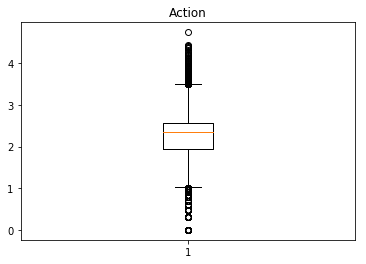

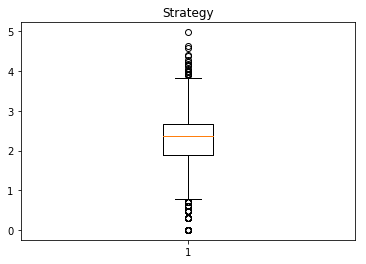

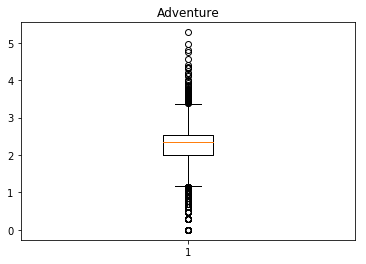

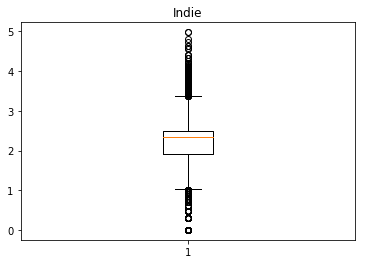

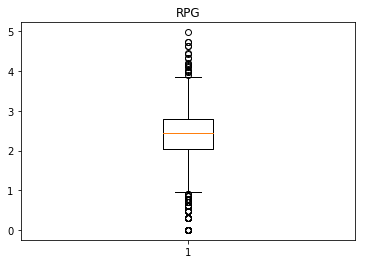

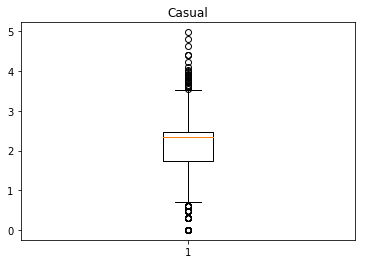

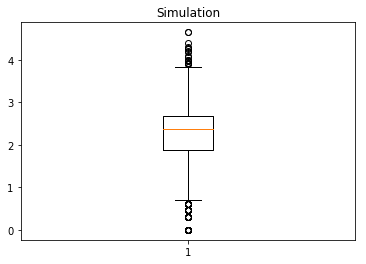

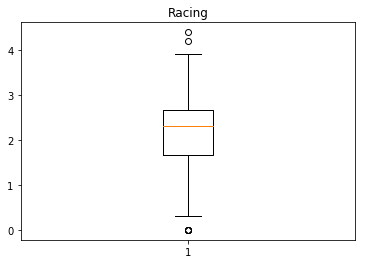

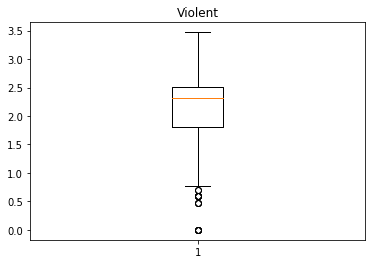

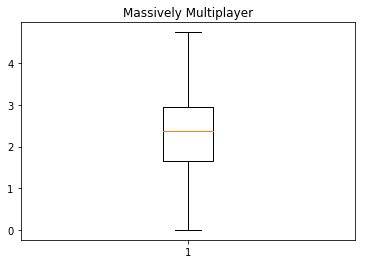

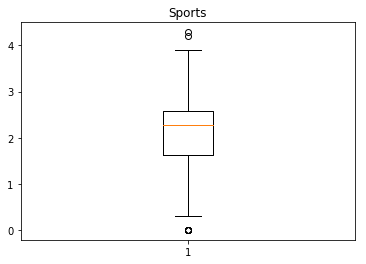

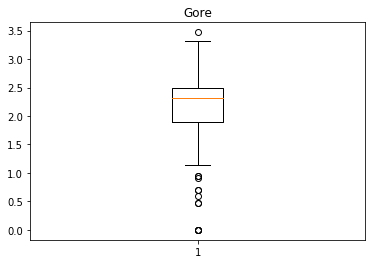

In [73]:
for i in lista_generos:
    t_medio = excel_jogos
    plt.boxplot(t_medio.loc[(t_medio.genres.str.contains(i)) & (t_medio.average_playtime > 0)].average_playtime)
    plt.title(i)
    plt.show()

# Log Tempo de jogo médio por gênero:

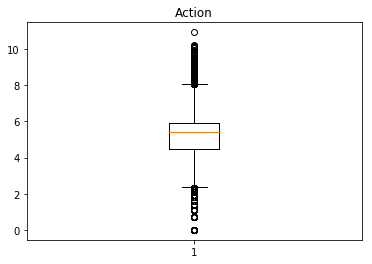

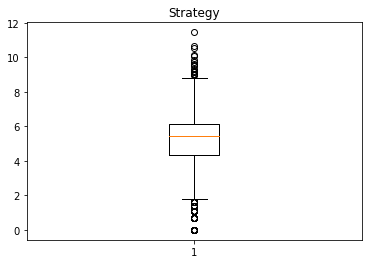

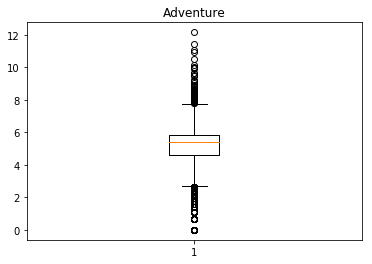

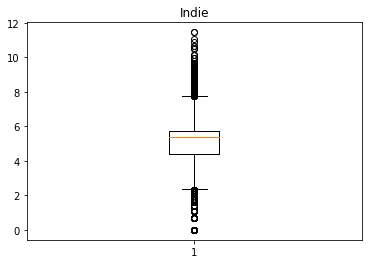

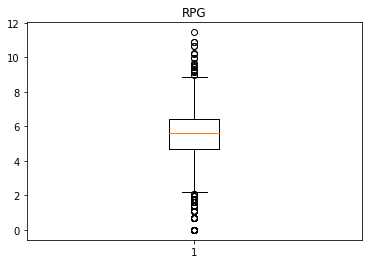

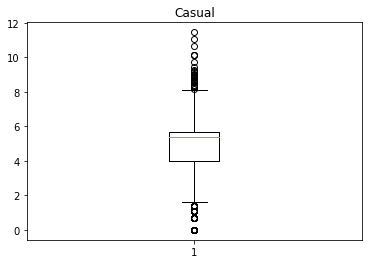

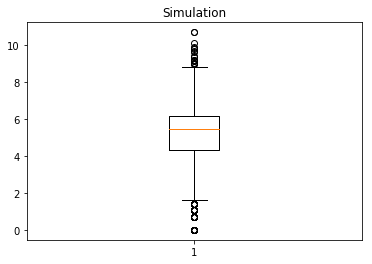

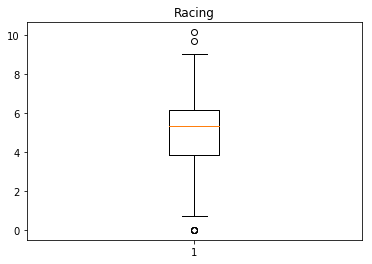

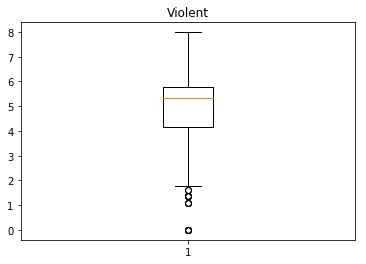

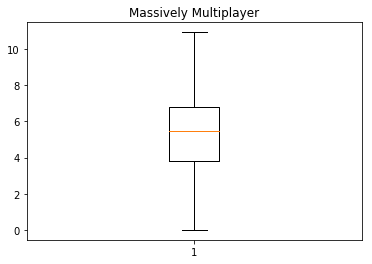

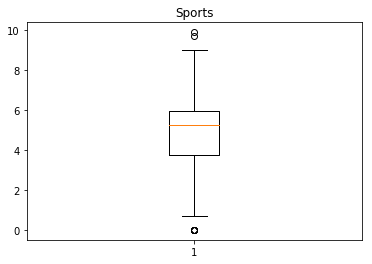

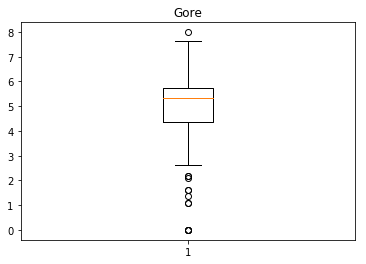

In [13]:
for i in lista_generos:
    t_medio = excel_jogos
    t_medio["log_average_playtime"] = np.log(t_medio["average_playtime"].loc[t_medio["average_playtime"]>0])
    plt.boxplot(t_medio.loc[(t_medio.genres.str.contains(i)) & (t_medio.average_playtime > 0)].log_average_playtime)
    plt.title(i)
    plt.show()

Quantos outliers por gênero?

# Jogadores por gênero

In [109]:
faixas = []
intervalo = []
valores = jogadores.owners.unique()
for i in valores:
    intervalo = i
    intervalo = intervalo.split("-")
    faixas.append(intervalo[0])
    faixas.append(intervalo[-1])
faixas = list(map(int, set(faixas)))
faixas.sort()
faixas[0] = faixas[0] + 1

[1,
 20000,
 50000,
 100000,
 200000,
 500000,
 1000000,
 2000000,
 5000000,
 10000000,
 20000000,
 50000000,
 100000000,
 200000000]